### Summary

In this notebook, we have a deeper look at the data, and start to build models step by step.

In [164]:
import pandas as pd
import numpy as np


In [165]:
train_data = pd.read_csv('../processed_input/train_data.csv')
validation_data = pd.read_csv('../processed_input/validation_data.csv')
test_data = pd.read_csv('../processed_input/test_data.csv')

monthly_train_data = pd.read_csv('../processed_input/monthly_train_data.csv')
monthly_train_data_avg = pd.read_csv('../processed_input/monthly_train_data_avg.csv')

monthly_validation_data = pd.read_csv('../processed_input/monthly_validation_data.csv')
monthly_test_data = pd.read_csv('../processed_input/monthly_test_data.csv')

In [166]:
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


##### Let us start with doing some visualizations on some sets of shop_id, item_id pairs

In [167]:
train_data[(train_data['shop_id'] == 25) & (train_data['item_id'] == 2555)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
4,15.01.2013,0,25,2555,1099.0,1.0
156152,22.02.2013,1,25,2555,1099.0,1.0
324218,11.03.2013,2,25,2555,1099.0,1.0
354219,05.04.2013,3,25,2555,1099.0,1.0
354220,16.04.2013,3,25,2555,1099.0,1.0
354221,26.04.2013,3,25,2555,1099.0,1.0
354222,28.04.2013,3,25,2555,1099.0,1.0
586055,23.06.2013,5,25,2555,1099.0,1.0
794531,02.08.2013,7,25,2555,1099.0,1.0
1141724,30.12.2013,11,25,2555,1149.0,1.0


##### Let us check out the most frequent shop_id,item_id combinations.

In [168]:
shop_id_item_id_groups = train_data[['shop_id', 'item_id', 'date']].groupby(['shop_id', 'item_id']).count()

In [169]:
shop_id_item_id_groups.reset_index(['shop_id', 'item_id'], inplace=True)

In [170]:
shop_id_item_id_groups.rename(columns={'date':'count'}, inplace=True)

In [171]:
shop_id_item_id_groups.sort_values(by=['count'], inplace=True, ascending=False)

In [172]:
shop_id_item_id_groups

,shop_id,item_id,count
357765,53,20949,814
192775,28,20949,808
223830,31,20949,802
135298,22,20949,797
94194,16,20949,779
384066,56,20949,775
278319,42,20949,773
48857,7,20949,772
239882,35,20949,768
127550,21,20949,766


##### Let us take a deeper look at those very frequent cases.

In [173]:
specific_df = train_data[(train_data['shop_id'] == 53) & (train_data['item_id'] == 20949)].sort_values(by=['date'])
specific_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1426765,01.02.2014,13,53,20949,5.0,5.0
2445600,01.02.2015,25,53,20949,5.0,1.0
1461828,01.03.2014,14,53,20949,5.0,11.0
2517520,01.03.2015,26,53,20949,5.0,4.0
1553875,01.04.2014,15,53,20949,5.0,4.0


##### Let us plot it and see how it looks !

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

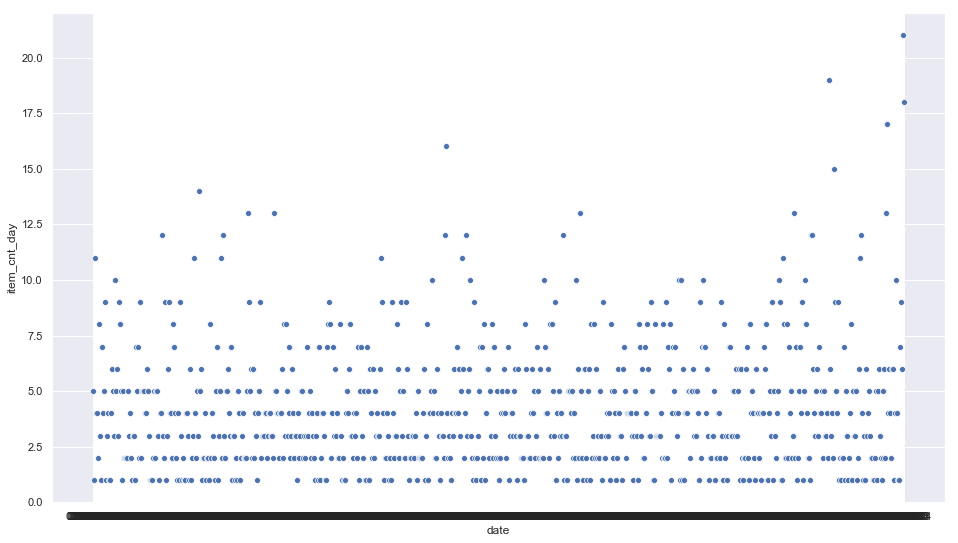

In [175]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))

sns.scatterplot(x='date', 
                y='item_cnt_day',  
                data=specific_df,
                ax=ax)


##### Let us have some more plots

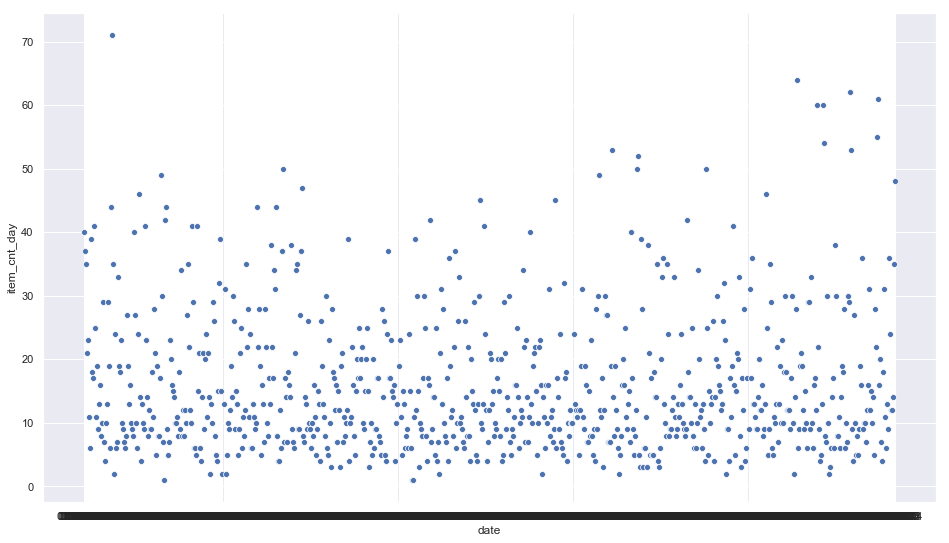

In [176]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))

sns.scatterplot(x='date', 
                y='item_cnt_day', 
                data=train_data[(train_data['shop_id'] == 28) & (train_data['item_id'] == 20949)].sort_values(by=['date']),
                ax=ax)



##### It looks like 20949 is a product in high demand. Let us check as to what it is !!

In [177]:
items = pd.read_csv("../input/items.csv")

In [178]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [179]:
items[(items['item_id'] == 20949)]

,item_name,item_id,item_category_id
20949,Фирменный пакет майка 1С Интерес белый (34*42)...,20949,71


##### Let us check out some cases apart from item 20949

In [180]:
shop_id_item_id_groups[(shop_id_item_id_groups['item_id'] != 20949)].head()

,shop_id,item_id,count
372088,55,492,747
62013,12,11370,583
213499,31,5822,570
78705,15,4181,452
221584,31,17717,430


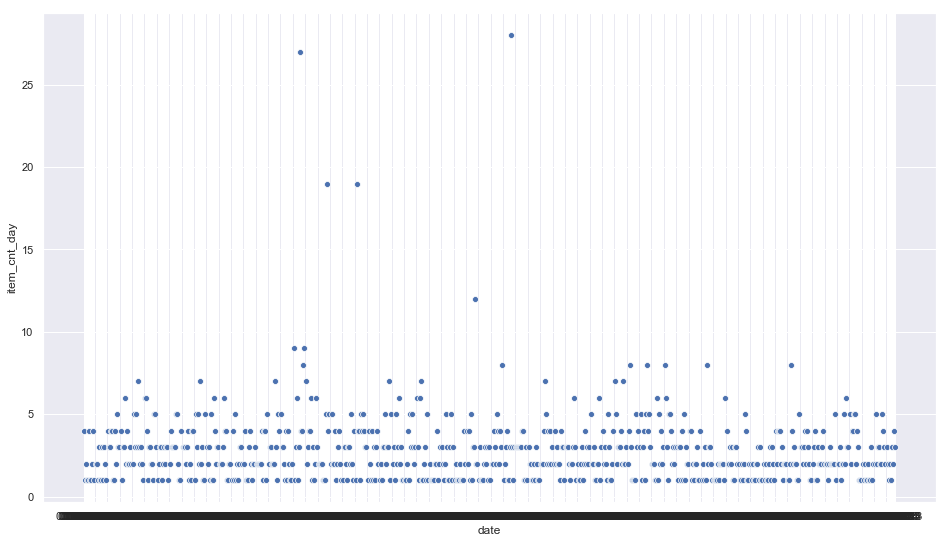

In [181]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))

sns.scatterplot(x='date', 
                y='item_cnt_day', 
                data=train_data[(train_data['shop_id'] == 55) & (train_data['item_id'] == 492)].sort_values(by=['date']),
                ax=ax)



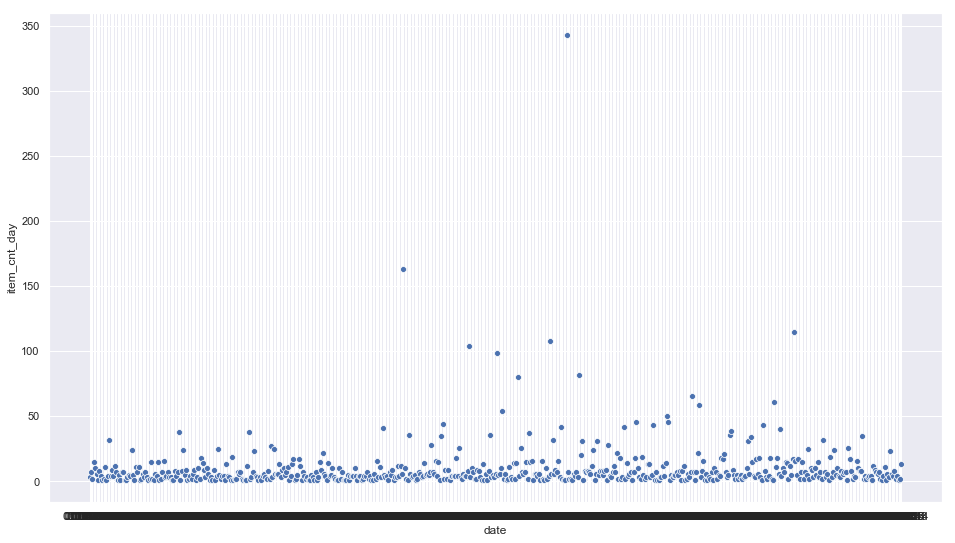

In [182]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))

sns.scatterplot(x='date', 
                y='item_cnt_day', 
                data=train_data[(train_data['shop_id'] == 12) & (train_data['item_id'] == 11370)].sort_values(by=['date']),
                ax=ax)



### Comments
From the data, it looks like a getting some sort of weighted average would give us the best guess on what is to happen in the future.

Since, we want to predict a monthly estimate in the end, let us start with the monthly average of the previous month alone as the first guess and start refining it further (we saw earlier that taking a straight flat average across all the previous months did not work well).

##### Let us have a look at the monthly data.


In [183]:
monthly_train_data.head()

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [184]:
monthly_validation_data.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_cnt_month_prediction
0,32,2,33,1.0,1
1,32,2,486,1.0,1
2,32,2,792,1.0,1
3,32,2,975,1.0,1
4,32,2,1090,1.0,1


##### Let us take the values for month 31 (for the corresponding shop and item) and use them as predictions for month 32

In [185]:
month_31_train_data = monthly_train_data[(monthly_train_data['date_block_num'] == 31)].copy()


In [186]:
month_31_train_data['shop_id_and_item_id'] = list(zip(month_31_train_data['shop_id'], 
                                                      month_31_train_data['item_id']))

In [187]:
shop_id_item_id_item_cnt = dict(zip(month_31_train_data.shop_id_and_item_id, 
                                    month_31_train_data.item_cnt_month))

In [188]:
monthly_validation_data['item_cnt_month_prediction'] = monthly_validation_data.apply(
    lambda x : shop_id_item_id_item_cnt.get((x.shop_id, x.item_id), -1), axis=1) 

##### Now, that we have a prediction, let us remove those entries for which we did not have any data for month 31 and see how we perform in the rest

In [189]:
len(monthly_validation_data)

29678

In [190]:
len(monthly_validation_data[(monthly_validation_data['item_cnt_month_prediction'] == -1)])

16464

In [191]:
# Since there are sizeable number of entries, let us remove them before computing the prediction score.
monthly_validation_data_processed = monthly_validation_data[(monthly_validation_data['item_cnt_month_prediction'] != -1)].copy()

In [192]:
from sklearn.metrics import mean_squared_error
rmse_validation_data = np.sqrt(mean_squared_error(monthly_validation_data_processed.item_cnt_month, 
                                                  monthly_validation_data_processed.item_cnt_month_prediction))

In [193]:
rmse_validation_data

24.88172415169437

##### Again, we see abysmal performance, even when the size of the datasets compared were quite small. Let us have a look at the data

In [194]:
monthly_validation_data_processed[['item_cnt_month', 'item_cnt_month_prediction']].head()

,item_cnt_month,item_cnt_month_prediction
2,1.0,2.0
8,1.0,1.0
10,2.0,3.0
11,1.0,3.0
13,4.0,5.0


##### One crazy idea : since there are many ones in the data, let us see what would happen if we set  all our predictions to 1 !

In [195]:
monthly_validation_data_processed['item_cnt_month_prediction'] = 1

In [196]:
rmse_validation_data = np.sqrt(mean_squared_error(monthly_validation_data_processed.item_cnt_month, 
                                                  monthly_validation_data_processed.item_cnt_month_prediction))

In [197]:
rmse_validation_data

27.393958074803404

##### Okay, this does not help much. Let us revert to the earlier scenario and analyze the big errors.

In [198]:
# Since there are sizeable number of entries, let us remove them before computing the prediction score.
monthly_validation_data_processed = monthly_validation_data[(monthly_validation_data['item_cnt_month_prediction'] != -1)].copy()

In [199]:
rmse_validation_data = np.sqrt(mean_squared_error(monthly_validation_data_processed.item_cnt_month, 
                                                  monthly_validation_data_processed.item_cnt_month_prediction))

In [200]:
rmse_validation_data

24.88172415169437

In [201]:
monthly_validation_data_processed['abs_diff_predictions_truth'] = \
    np.abs(monthly_validation_data_processed['item_cnt_month'] - monthly_validation_data_processed['item_cnt_month_prediction'])

In [202]:
monthly_validation_data_processed.sort_values(by=['abs_diff_predictions_truth'], ascending=False)

,date_block_num,shop_id,item_id,item_cnt_month,item_cnt_month_prediction,abs_diff_predictions_truth
26495,32,55,9249,1644.0,19.0,1625.0
4105,32,12,9248,1644.0,19.0,1625.0
26496,32,55,9251,1117.0,193.0,924.0
4104,32,12,9244,597.0,29.0,568.0
26493,32,55,9245,597.0,29.0,568.0
26494,32,55,9247,716.0,157.0,559.0
26497,32,55,9253,516.0,14.0,502.0
4106,32,12,9252,516.0,14.0,502.0
26498,32,55,9255,539.0,71.0,468.0
10459,32,25,9250,208.0,28.0,180.0


##### There looks to be too many entries where the predictions are way different than the truth. Can we quantify the same ?

In [203]:
len(monthly_validation_data_processed[monthly_validation_data_processed['abs_diff_predictions_truth'] > 100])*100/len(monthly_validation_data_processed)

0.12108369910700773

In [204]:
len(monthly_validation_data_processed[monthly_validation_data_processed['abs_diff_predictions_truth'] > 50])*100/len(monthly_validation_data_processed)

0.2118964734372635

In [205]:
len(monthly_validation_data_processed[monthly_validation_data_processed['abs_diff_predictions_truth'] > 5])*100/len(monthly_validation_data_processed)

4.4498259421825335

In [206]:
len(monthly_validation_data_processed[monthly_validation_data_processed['abs_diff_predictions_truth'] > 1])*100/len(monthly_validation_data_processed)

28.235205085515364

##### Okay, so only 4% of the entries have absolute difference > 5. Let us try to take a look at some of these big errors.

In [207]:
monthly_train_data[(monthly_train_data['shop_id'] == 55) & (monthly_train_data['item_id'] == 9249)].sort_values(by=['date_block_num'])

,date_block_num,shop_id,item_id,item_cnt_month
1413136,27,55,9249,13.0
1445472,28,55,9249,13.0
1477102,29,55,9249,3.0
1510585,30,55,9249,12.0
1543916,31,55,9249,19.0


In [208]:
validation_data[(validation_data['shop_id'] == 55) & (validation_data['item_id'] == 9249)].sort_values(by=['date'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
19275,01.09.2015,32,55,9249,1500.000000,3.0
19276,02.09.2015,32,55,9249,1500.000000,3.0
19277,03.09.2015,32,55,9249,1500.000000,1.0
19278,04.09.2015,32,55,9249,1500.000000,1.0
19279,06.09.2015,32,55,9249,1500.000000,5.0
19280,07.09.2015,32,55,9249,1500.000000,1.0
19302,08.09.2015,32,55,9249,1500.000000,1.0
19303,09.09.2015,32,55,9249,1500.000000,4.0
19304,10.09.2015,32,55,9249,1500.000000,7.0
19305,11.09.2015,32,55,9249,1500.000000,8.0


In [209]:
train_data[(train_data['shop_id'] == 55) & (train_data['item_id'] == 9249)].sort_values(by=['date'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2645340,01.05.2015,28,55,9249,1300.0,3.0
2744909,01.07.2015,30,55,9249,1300.0,7.0
2792580,01.08.2015,31,55,9249,1300.0,1.0
2792591,04.08.2015,31,55,9249,1300.0,1.0
2792579,05.08.2015,31,55,9249,1300.0,1.0
2792577,09.08.2015,31,55,9249,1300.0,1.0
2645403,11.05.2015,28,55,9249,1300.0,1.0
2710354,11.06.2015,29,55,9249,1300.0,2.0
2792576,11.08.2015,31,55,9249,1300.0,2.0
2792575,12.08.2015,31,55,9249,1300.0,2.0


##### This looks like a really exceptional case, as there were really outlier days in the validation set. Let us check out some other entries.

In [210]:
validation_data[(validation_data['shop_id'] == 12) & (validation_data['item_id'] == 9244)].sort_values(by=['date'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
32442,01.09.2015,32,12,9244,1100.000000,3.0
32431,02.09.2015,32,12,9244,1100.000000,4.0
32432,03.09.2015,32,12,9244,1100.000000,1.0
32433,04.09.2015,32,12,9244,1100.000000,2.0
32434,05.09.2015,32,12,9244,1100.000000,1.0
32435,06.09.2015,32,12,9244,1100.000000,1.0
32436,07.09.2015,32,12,9244,1100.000000,5.0
32437,08.09.2015,32,12,9244,1100.000000,3.0
32438,09.09.2015,32,12,9244,1100.000000,1.0
32439,10.09.2015,32,12,9244,1100.000000,5.0


In [211]:
train_data[(train_data['shop_id'] == 12) & (train_data['item_id'] == 9244)].sort_values(by=['date'])

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2625818,01.05.2015,28,12,9244,900.0,1.0
2805584,01.08.2015,31,12,9244,900.0,2.0
2805596,02.08.2015,31,12,9244,900.0,1.0
2805585,03.08.2015,31,12,9244,900.0,1.0
2805586,04.08.2015,31,12,9244,900.0,3.0
2700407,05.06.2015,29,12,9244,900.0,1.0
2805587,08.08.2015,31,12,9244,900.0,1.0
2731537,09.07.2015,30,12,9244,900.0,1.0
2805588,10.08.2015,31,12,9244,900.0,1.0
2700408,12.06.2015,29,12,9244,900.0,1.0


##### We see the exact pattern here as well.

##### Let us do one final thing here. Let us check how our model performs, when we exclude big errors, that is when we discard ~ 4.5% of data.

In [212]:
monthly_validation_data_processed_v2 =  monthly_validation_data_processed[monthly_validation_data_processed['abs_diff_predictions_truth'] <=  5]

In [213]:
rmse_validation_data_v2 = np.sqrt(mean_squared_error(monthly_validation_data_processed_v2.item_cnt_month, 
                                                     monthly_validation_data_processed_v2.item_cnt_month_prediction))

In [214]:
rmse_validation_data_v2

1.584791292416627

##### Okay so that is a solace. The score decreases rapidly, when we exclude the big problematic errors. 

##### Now, let us study the data more deeply so as to figure out these entries for which we see big deviations between actual and predicted values. Let us do that in a new notebook


##### Saw this only now. The true values are clipped into [0,20] range. So let us do that on the validation data set (as well as on our predictions as well) and see how it improves the score !

In [215]:
monthly_validation_data_processed.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_cnt_month_prediction,abs_diff_predictions_truth
2,32,2,792,1.0,2.0,1.0
8,32,2,1384,1.0,1.0,0.0
10,32,2,1469,2.0,3.0,1.0
11,32,2,1483,1.0,3.0,2.0
13,32,2,1486,4.0,5.0,1.0


In [216]:
monthly_validation_data_processed['item_cnt_month'] = \
    monthly_validation_data_processed['item_cnt_month'].apply(lambda x : np.clip(x, 0, 20))

In [217]:
monthly_validation_data_processed['item_cnt_month_prediction'] = \
    monthly_validation_data_processed['item_cnt_month_prediction'].apply(lambda x : np.clip(x, 0, 20))

In [218]:
rmse_validation_data = np.sqrt(mean_squared_error(monthly_validation_data_processed.item_cnt_month, 
                                                  monthly_validation_data_processed.item_cnt_month_prediction))

In [219]:
rmse_validation_data

2.4061780379085658

###### Enhancement (let us name it, say Model 1)

Let us enhance this model by setting a default value of 1 for those cases when we do not have historical data.


In [220]:
monthly_validation_data['item_cnt_month_prediction'] = monthly_validation_data.apply(
    lambda x : shop_id_item_id_item_cnt.get((x.shop_id, x.item_id), 1), axis=1) 

In [221]:
# Put the clippings to a routine for easy access.
def clip_predictions_and_actual_vals(df, 
                                     actual_value_col='item_cnt_month', 
                                     prediction_col='item_cnt_month_prediction'):
    df[actual_value_col] = \
        df[actual_value_col].apply(lambda x : np.clip(x, 0, 20))
    df[prediction_col] = \
        df[prediction_col].apply(lambda x : np.clip(x, 0, 20))    
    


In [222]:
clip_predictions_and_actual_vals(monthly_validation_data)
rmse_validation_data = np.sqrt(mean_squared_error(monthly_validation_data.item_cnt_month, 
                                                  monthly_validation_data.item_cnt_month_prediction))    
rmse_validation_data

2.371525322220323

##### Enhancing to use the data of the most recent month in the past (let us say, Model2)
In this scenario, we have used the data only for the previous month. Let us enhance this model, by using the data for most recent available in the past, that is to use the data that was available 2 months ago, if the data for the immediately preceding month was not available.

In [223]:
monthly_train_data['shop_id_and_item_id'] = list(zip(monthly_train_data['shop_id'], 
                                                     monthly_train_data['item_id']))

In [224]:
shop_id_item_id_item_cnt = dict(zip(monthly_train_data.shop_id_and_item_id, 
                                    monthly_train_data.item_cnt_month))

In [225]:
monthly_validation_data['item_cnt_month_prediction'] = monthly_validation_data.apply(
    lambda x : shop_id_item_id_item_cnt.get((x.shop_id, x.item_id), 1), axis=1) 

In [226]:
clip_predictions_and_actual_vals(monthly_validation_data)
rmse_validation_data = np.sqrt(mean_squared_error(monthly_validation_data.item_cnt_month, 
                                                  monthly_validation_data.item_cnt_month_prediction))    
rmse_validation_data

2.4167171118048683

#### Comments

It looks like the most recent value is having the best predictive value and a default of 1 is not really that bad (in case we not have data).

This gives us the following idea from Bayesian statistics. Keep 1 as the prior prediction and the historical value as the posterior prediction. The more recent, the historical value is, a bigger weight will be allotted to the same.

Let us implement the same with exponential weighting (and let us call it Model 3)



In [227]:
monthly_train_data['hist_val_weight'] = np.exp(monthly_train_data['date_block_num'] - 31)

In [228]:
monthly_train_data['default_val_weight'] = 1.0 - monthly_train_data['hist_val_weight']

In [229]:
monthly_train_data['default_val'] = 1.0

In [230]:
monthly_train_data['weighted_val'] = \
    monthly_train_data['hist_val_weight'] * monthly_train_data['item_cnt_month'] + \
    monthly_train_data['default_val_weight'] * monthly_train_data['default_val']

In [231]:
shop_id_item_id_item_cnt = dict(zip(monthly_train_data.shop_id_and_item_id, 
                                    monthly_train_data.weighted_val))

In [232]:
monthly_validation_data['item_cnt_month_prediction'] = monthly_validation_data.apply(
    lambda x : shop_id_item_id_item_cnt.get((x.shop_id, x.item_id), 1), axis=1) 

In [233]:
clip_predictions_and_actual_vals(monthly_validation_data)
rmse_validation_data = np.sqrt(mean_squared_error(monthly_validation_data.item_cnt_month, 
                                                  monthly_validation_data.item_cnt_month_prediction))    
rmse_validation_data

2.3656980411044537

##### Not much of an improvement.

Let us see the cases where we have a huge deviance and try to drill down on the same.

In [234]:
monthly_validation_data['abs_diff_predictions_truth'] = \
    np.abs(monthly_validation_data['item_cnt_month'] - monthly_validation_data['item_cnt_month_prediction'])

In [235]:
monthly_validation_data.sort_values(by=['abs_diff_predictions_truth'], ascending=False).head()

,date_block_num,shop_id,item_id,item_cnt_month,item_cnt_month_prediction,abs_diff_predictions_truth
4226,32,12,13532,0.0,20.0,20.0
4283,32,12,15069,20.0,1.0,19.0
18944,32,42,3352,20.0,1.0,19.0
5684,32,16,3351,20.0,1.0,19.0
16041,32,35,3351,20.0,1.0,19.0


In [236]:
monthly_validation_data['shop_id_and_item_id'] = list(zip(monthly_validation_data['shop_id'], 
                                                          monthly_validation_data['item_id']))

In [237]:
monthly_validation_data['is_hist_data_present'] = \
    monthly_validation_data['shop_id_and_item_id'].apply(lambda x : x in shop_id_item_id_item_cnt.keys())

In [238]:
monthly_validation_data.sort_values(by=['abs_diff_predictions_truth'], ascending=False).head(30)

,date_block_num,shop_id,item_id,item_cnt_month,item_cnt_month_prediction,abs_diff_predictions_truth,shop_id_and_item_id,is_hist_data_present
4226,32,12,13532,0.0,20.0,20.0,"(12, 13532)",True
4283,32,12,15069,20.0,1.0,19.0,"(12, 15069)",False
18944,32,42,3352,20.0,1.0,19.0,"(42, 3352)",False
5684,32,16,3351,20.0,1.0,19.0,"(16, 3351)",False
16041,32,35,3351,20.0,1.0,19.0,"(35, 3351)",False
2905,32,7,3351,20.0,1.0,19.0,"(7, 3351)",False
2904,32,7,3350,20.0,1.0,19.0,"(7, 3350)",False
12810,32,28,8738,20.0,1.0,19.0,"(28, 8738)",False
18942,32,42,3350,20.0,1.0,19.0,"(42, 3350)",False
18943,32,42,3351,20.0,1.0,19.0,"(42, 3351)",False


In [239]:
monthly_train_data[monthly_train_data['item_id'] == 4840]

,date_block_num,shop_id,item_id,item_cnt_month,shop_id_and_item_id,hist_val_weight,default_val_weight,default_val,weighted_val


##### Lack of historical data.

In majority of these cases, we see that there is simply no historical data avaiable (many times, no historical data, even for that item, leave alone, the shop and item combination).



##### Check whether this happens in real test data.

Now, since we have seen that a large number of cases with no historical data cause our net predictive score to go awry, let us see if this is simply an artifact of our construction of the validation set/test set or whether this is indeed  the case in the actual test set.

Putting it in simple terms, let us see how many entries we find in the test set, for which we do not have any data in the training set.

In [240]:
test_full = pd.read_csv('../input/test.csv')

In [241]:
train_full = pd.read_csv('../input/sales_train.csv')

In [242]:
train_full['shop_id_and_item_id'] = list(zip(train_full['shop_id'], train_full['item_id']))
test_full['shop_id_and_item_id'] = list(zip(test_full['shop_id'], test_full['item_id']))

In [243]:
shop_id_item_id_item_cnt = dict(zip(train_full.shop_id_and_item_id, 
                                    train_full.item_cnt_day))

In [244]:
test_full['is_hist_data_present'] = \
    test_full['shop_id_and_item_id'].apply(lambda x : x in shop_id_item_id_item_cnt.keys())

In [245]:
test_full[['is_hist_data_present']].describe()

,is_hist_data_present
count,214200
unique,2
top,True
freq,111404


In [246]:
len(test_full)

214200

In [247]:
len(test_full[test_full['is_hist_data_present'] == True])

111404

In [248]:
len(test_full[test_full['is_hist_data_present'] == False])

102796

In [249]:
len(test_full[test_full['is_hist_data_present'] == False])/len(test_full)

0.479906629318394

##### 48% of the test data does not have a corresponding entry in the historical data set.

That is quite surprising and unexpected. Let us see how things fare, when we check for items alone (and not the shop and item combination).

In [250]:
item_id_item_cnt = dict(zip(train_full.item_id, 
                            train_full.item_cnt_day))

In [251]:
test_full['is_item_hist_data_present'] = \
    test_full['item_id'].apply(lambda x : x in item_id_item_cnt.keys())

In [252]:
test_full[['is_item_hist_data_present']].describe()

,is_item_hist_data_present
count,214200
unique,2
top,True
freq,198954


In [253]:
len(test_full[test_full['is_item_hist_data_present'] == False])/len(test_full)

0.0711764705882353

##### Only 7% of the items are completely new, that is, which have not been associated with any shop in the training set.

That is a solace, since that would mean we could use historical data for some shop for 93% of the items under consideration.


Let us see how things look, in our validation set .

In [254]:
len(monthly_validation_data[monthly_validation_data['is_hist_data_present'] == True])/len(monthly_validation_data)

0.8259990565401981

##### Okay, that is a lot better than the actual test set. Let us see the corresponding number for item_id's alone.

In [255]:
item_id_item_cnt = dict(zip(monthly_train_data.item_id, 
                            monthly_train_data.item_cnt_month))

In [256]:
monthly_validation_data['is_item_hist_data_present'] = monthly_validation_data['item_id'].apply(lambda x : x in item_id_item_cnt.keys())

In [257]:
len(monthly_validation_data[monthly_validation_data['is_item_hist_data_present'] == True])/len(monthly_validation_data)

0.9289372599231754

##### New proposition (let us call it Model 4)

Let us try the following. For the previous month, if we have data for the current shop and item combination , let us use the same as the prediction for the next month. If we do not have the data for the relevant shop and item combination, but have data for the same item across different shops, let us average across them and use them as prediction for the next month.

In [258]:
shop_id_item_id_item_cnt = dict(zip(month_31_train_data.shop_id_and_item_id, 
                                    month_31_train_data.item_cnt_month)) 

In [259]:
month_31_train_data[month_31_train_data['item_id'] == 38]

,date_block_num,shop_id,item_id,item_cnt_month,shop_id_and_item_id
1518651,31,12,38,1.0,"(12, 38)"
1520710,31,16,38,1.0,"(16, 38)"
1523838,31,22,38,1.0,"(22, 38)"
1527663,31,28,38,1.0,"(28, 38)"
1529230,31,31,38,2.0,"(31, 38)"
1535101,31,42,38,1.0,"(42, 38)"


In [260]:
month_31_train_data_item_avg = month_31_train_data[['item_id', 'item_cnt_month']].groupby(['item_id']).mean()

In [261]:
month_31_train_data_item_avg.reset_index(['item_id'], inplace=True)

In [262]:
item_id_item_cnt_avg = dict(zip(month_31_train_data.item_id, 
                                month_31_train_data.item_cnt_month)) 

In [263]:
monthly_validation_data['item_cnt_month_shop_id_item_id_prediction'] = monthly_validation_data.apply(
    lambda x : shop_id_item_id_item_cnt.get((x.shop_id, x.item_id), 1), axis=1) 

In [264]:
monthly_validation_data['item_cnt_month_item_id_prediction'] = monthly_validation_data.apply(
    lambda x : item_id_item_cnt_avg.get(x.item_id, -1000), axis=1) 

In [265]:
monthly_validation_data['item_cnt_month_prediction'] = monthly_validation_data[
    ['item_cnt_month_shop_id_item_id_prediction', 'item_cnt_month_item_id_prediction']].max(axis=1)

In [266]:
monthly_validation_data.loc[
    (monthly_validation_data['item_cnt_month_prediction'] == -1000), 'item_cnt_month_prediction'] = 1

In [267]:
clip_predictions_and_actual_vals(monthly_validation_data)
rmse_validation_data = np.sqrt(mean_squared_error(monthly_validation_data.item_cnt_month, 
                                                  monthly_validation_data.item_cnt_month_prediction))    
rmse_validation_data

2.712894235764274

##### Okay , so that does not look to work well. Let us try things somewhat differently in another notebook.